### Quantitative Analysis of Price & Daily Returns

- Can returns be described with a normal distribution?
- Is directional bias in daily change?
- Can price movement be described as a random walk?

### 1. Set up environment
- pay attention the value of data is percentage

In [2]:
import numpy as np
import pandas as pd
import pandas_datareader as reader
import matplotlib.pyplot as plt
from matplotlib import rcParams
rcParams['figure.figsize'] = 8,6
import seaborn as sb
sb.set()

2. Set up Stock and Timeframe, prepare the Data

In [14]:
# if dont specific period, assume download 3 years daily data
stock = 'AMZN'
amzn = reader.get_data_yahoo(stock)['Adj Close']
amzn.head()

Date
2017-08-21    47.664501
2017-08-22    48.345001
2017-08-23    47.900002
2017-08-24    47.622501
2017-08-25    47.263000
Name: Adj Close, dtype: float64

In [22]:
# we can turn it into a df, but we are happy with a series right now
# convert to %, and round to 2 decimals
amzn_return = round(np.log(amzn).diff().dropna()*100,2)
amzn_return.head()

Date
2017-08-22    1.42
2017-08-23   -0.92
2017-08-24   -0.58
2017-08-25   -0.76
2017-08-28    0.08
Name: Adj Close, dtype: float64

<AxesSubplot:xlabel='Date'>

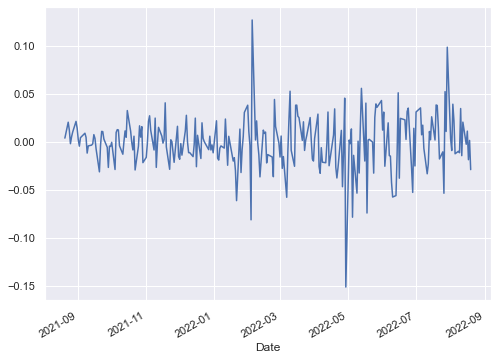

In [18]:
# just plot latest year's data
amzn_return[-252:].plot()
# seems lots of unpredictable variance

### 2. Descriptive Statistics
- assume dealing with a sample, so t-dist, not z-dist
- assume missing values will be omitted by Pandas
- in 2022, slight negative skewness
- it is a fischer kurtosis, 5.25 means, there is 5.25 kurtosis excess comparing with normal dist's kurtosis as 3, so the kurtosis of below data is 5.25+3=8.25
- much peaked, data will be more centric, and fatter tails, higher probi for extreme values

In [23]:
amzn_return.describe()

count    1258.000000
mean        0.084658
std         2.157870
min       -15.140000
25%        -0.900000
50%         0.150000
75%         1.127500
max        12.690000
Name: Adj Close, dtype: float64

In [24]:
# Scipy way, same result, also shows the kurtosis and skewness
# variance is the sqaure ofs std
from scipy import stats
stats.describe(amzn_return)

DescribeResult(nobs=1258, minmax=(-15.14, 12.69), mean=0.08465818759936405, variance=4.656401036611509, skewness=-0.12354452195818738, kurtosis=5.257648767401024)

In [32]:
# unpack the scipy descriptive results into variables for individual call
n, minmax, mean, var, skew, kurt = stats.describe(amzn_return)
mini, maxi = minmax #split the tuple minmax by unpacking
std = var**(1/2)
print(mini)
print(std)

-15.14
2.1578695596841597


### 3. for comparision generate random numbers follow normal distribution
- before looking into the stats comparison, we will visualize the comparison first
- using the mean, std, and number of datas of amzn_return to create a normal dist, then compare it with the real distribution

In [36]:
from scipy.stats import norm

(array([  1.,   0.,   0.,   6.,   7.,  28., 101., 338., 566., 142.,  52.,
         12.,   1.,   2.,   2.]),
 array([-15.14      , -13.28466667, -11.42933333,  -9.574     ,
         -7.71866667,  -5.86333333,  -4.008     ,  -2.15266667,
         -0.29733333,   1.558     ,   3.41333333,   5.26866667,
          7.124     ,   8.97933333,  10.83466667,  12.69      ]),
 <BarContainer object of 15 artists>)

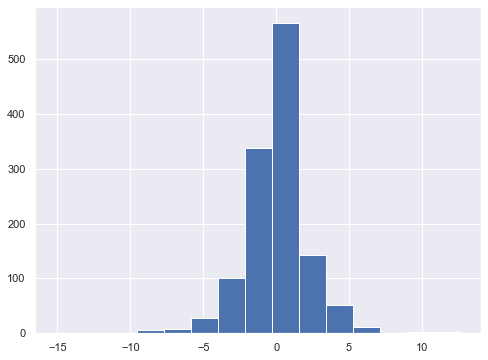

In [33]:
plt.hist(amzn_return, bins = 15)
# some uesless info, suppress them by adding;

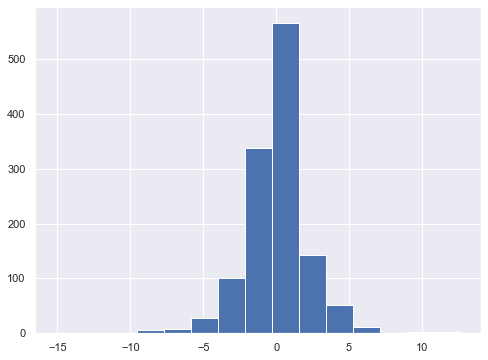

In [34]:
plt.hist(amzn_return, bins = 15);

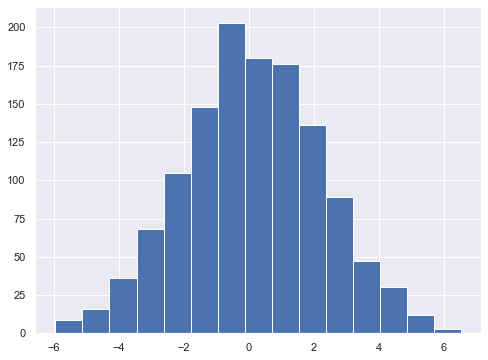

In [37]:
# rvs(loc=0, scale=1, size=1, random_state=None)
x = norm.rvs(mean, std,n)
plt.hist(x,bins=15);
plt.title('normal distribution ')

# 4. Use scipy stats to test the kurtosis
- the null hypothesis is that the sample drawn from a population is under normal dist
- if we have enough evidence, we can reject the null
- enough means if the sample mean' stats is much different with a normal dist should be
- how much diiference we can accept depends on the alpha we chosen
- generally we need t test to be over +-2 to start rejecting
- but here we didnt set up alpha, so we dont know what critical value we are looking for
- for P-value, general threshold is .05
- A p-value less than 0.05 (typically ≤ 0.05) is statistically significant. It indicates strong evidence against the null hypothesis, as there is less than a 5% probability the null is correct (and the results are random). Therefore, we reject the null hypothesis, and accept the alternative hypothesis.
- 0.27 means rate of making type 1 error, if we reject the null, we have 27% chance to commit that, we dont want to make mistake easily, so we dont reject the null.
- so we assume x comes from normal distribution, while AMZN doesnt

In [38]:
x_test = stats.kurtosistest(x)
amzn_test = stats.kurtosistest(amzn_return)

In [40]:
# setting the print out format

print(f'{"     Test statistic":20}{"p-value":>15}')
print(f'{" "*5}{"-"* 30}')
print(f"x:{x_test[0]:>17.2f}{x_test[1]:16.4f}")
print(f"AMZN: {amzn_test[0]:13.2f}{amzn_test[1]:16.4f}")

     Test statistic         p-value
     ------------------------------
x:            -1.09          0.2775
AMZN:         12.30          0.0000


### 5. plot histogram of price changes with normal curve overlay
- so AMZN_return cannot be described as norm dist
- reference: pdf plot, it is using mean, std to change the frequency of values in the linspace set: https://pythonguides.com/python-scipy-stats-norm/

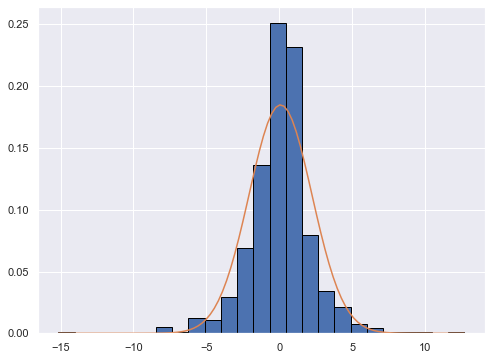

In [50]:
# density=True is to see the proportion, not the absolute value
plt.hist(amzn_return, bins=25, edgecolor='black', density=True)
# then we set a line follow normal distribution, using the stats of amzn
# make an array of 100 equally spaced datapoints
overlay=np.linspace(mini, maxi, 100)
plt.plot(overlay, norm.pdf(overlay, mean, std));

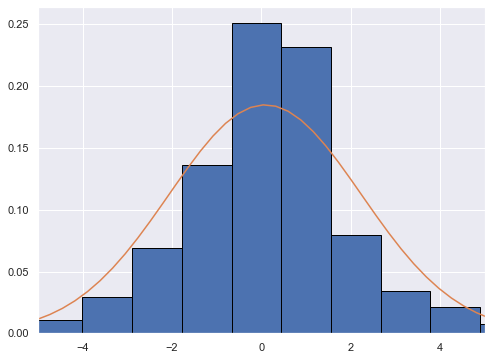

In [56]:
# zoom in 
plt.hist(amzn_return, bins=25, edgecolor='black', density=True)
overlay=np.linspace(mini, maxi, 100)
plt.plot(overlay, norm.pdf(overlay, mean, std))
plt.xlim(-5,5);

what should the distribution of the data looks like if it follows normal distribution
- we can see, it has thinner tail, data are centraily gather in the centre

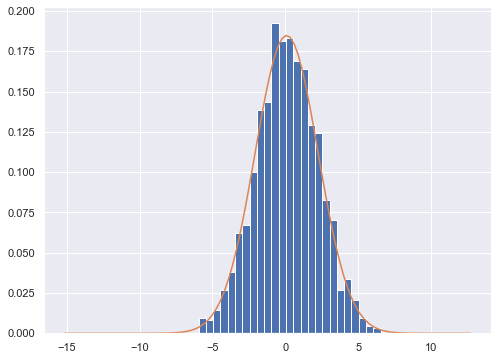

In [55]:
plt.hist(x, bins =25, density = True)
# set up the normal dist line to check if x's dist follows normal or not
b = np.linspace(mini, maxi, 100)
plt.plot(b,stats.norm.pdf(b, mean, std));

6. ### Can price movement be described as a random walk?
- Conduct simple hypothesis test
- we conclude that we cant reject the null that price change has no direction bias given the pv 0.16>.05, which isnt significant enough to reject the null
- t-stats is how many std from the mean
- for 1 year sample t-test, it can be interpreted that 85% time I dont want to reject the null to avoid making type 1 mistake
- reference:https://www.statology.org/one-sample-t-test-python/
- the point is the 3 years data is also a sample only, we are interested using the sample to describe the population
- so use t-test, setting expected population mean as 0
- in short, we assume population has no directional bias of return, and try to use the sample we have to support or reject it

In [65]:
# t test on 1 sample
# 2 tail test, see is it different from 0, if <, > 0, we will reject null that assuming the sample comes from a population with mean = 0
# here, the sample size is large, 3 years data
tstat, pvalue = stats.ttest_1samp(amzn_return, 0, alternative='two-sided')
np.round([tstat,pvalue], 2)

array([1.39, 0.16])

In [ ]:
# we limit the sample size as 1 year data, about 20% of the data to do the test

In [67]:
tstat, pvalue = stats.ttest_1samp(amzn_return.sample(252), 0, alternative='two-sided')
np.round([tstat,pvalue], 2)

array([-0.18,  0.85])

### 7. Can price movement be described as a random walk?
- to fulfill what requirement can we describe it as random walk?
- if the price change is random, the best predictor is using today's price to predict tomorrow's price, should have no pattern we can find

Create price lag

In [72]:
amzn = pd.DataFrame(amzn)
amzn['lag_1'] = amzn['Adj Close'].shift(1)
amzn['lag_2'] = amzn['Adj Close'].shift(2)
amzn.dropna(inplace=True)
amzn.head()

,Adj Close,lag_1,lag_2
Date,,,
2017-08-23,47.900002,48.345001,47.664501
2017-08-24,47.622501,47.900002,48.345001
2017-08-25,47.263000,47.622501,47.900002
2017-08-28,47.300999,47.263000,47.622501
2017-08-29,47.702999,47.300999,47.263000


Fit Linear Model
- input list of IVs first, then then DV
- rcond is for setting values below certain threshold level to 0, easier to read only. here we dont set any
- np.dot -> 0.97*lag_1 + 0.028*lag_2
- RMSE is the sample standard error
- it means, along the regression line, how long our hands should be to grapes most of the data point of the observation

In [82]:
lr = np.linalg.lstsq(amzn[['lag_1','lag_2']], amzn['Adj Close'], rcond=None)[0]
lr
# the result is the slope coefficient of lag1 and lag2 
# it means 97% of tomorrow's price can be predicted by today's price
# and the rest of the 2.8% can be predicted by lag2

array([0.97204064, 0.02819725])

In [84]:
# use this regress to do a prediction, and compare it with the actual data
amzn['predict'] = np.dot(amzn[['lag_1', 'lag_2']], lr)
amzn.head()

,Adj Close,lag_1,lag_2,predict
Date,,,,
2017-08-23,47.900002,48.345001,47.664501,48.337314
2017-08-24,47.622501,47.900002,48.345001,47.923944
2017-08-25,47.263000,47.622501,47.900002,47.641655
2017-08-28,47.300999,47.263000,47.622501,47.284381
2017-08-29,47.702999,47.300999,47.263000,47.311180


<AxesSubplot:xlabel='Date'>

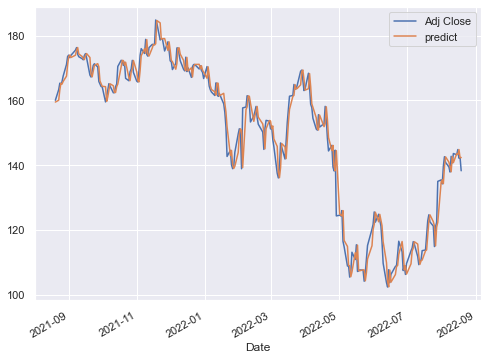

In [93]:
amzn[['Adj Close','predict']].iloc[-252:].plot()

In [97]:
amzn['error'] = amzn['predict'] - amzn['Adj Close']
SSE = np.square(amzn['error'].sum())
SSE = np.abs(SSE) # since SSE might be negative
df = 2
MSE = SSE/df
RMSE = MSE**(1/2)

3352.685626804394

In [98]:
amzn.head()

,Adj Close,lag_1,lag_2,predict,error
Date,,,,,
2017-08-23,47.900002,48.345001,47.664501,48.337314,0.437312
2017-08-24,47.622501,47.900002,48.345001,47.923944,0.301443
2017-08-25,47.263000,47.622501,47.900002,47.641655,0.378655
2017-08-28,47.300999,47.263000,47.622501,47.284381,-0.016618
2017-08-29,47.702999,47.300999,47.263000,47.311180,-0.391819


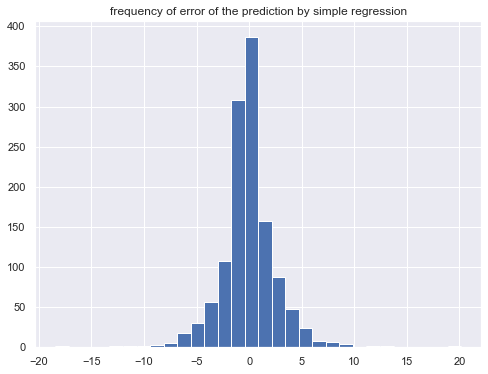

In [102]:
plt.hist(amzn['error'], bins=30)
plt.title('frequency of error of the prediction by simple regression');